# Uber Data Analysis

## Data description
START_DATE: Timestamp that marks the start of the trip.<br>
END_DATE: Timestamp that marks the end of the trip.<br>
CATEGORY: Uber customer category.<br>
START: Location that marks the start of the trip.<br>
STOP: Location that marks the start of the trip.<br>
MILES: Travel distance.<br>
PURPOSE: Customer's purpose of ordering Uber.<br>

## Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import folium

## Display basic information about the dataset

In [4]:
df= pd.read_csv('UberDataset.csv')
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [5]:
# Droping unnecessary record with index 1155
df.drop(index=1155, axis=0, inplace=True)
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [6]:
# Summary statistics
print(df.describe())

             MILES
count  1155.000000
mean     10.566840
std      21.579106
min       0.500000
25%       2.900000
50%       6.000000
75%      10.400000
max     310.300000


In [7]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

## Data Preprocessing

### Replacing empty strings with 'NA'

In [8]:
df.replace('', 'NA', inplace=True)
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Converting necessary column to datetime object

In [9]:
# Converting START_DATE datatypes
df['START_DATE'] = pd.to_datetime(df['START_DATE'], infer_datetime_format=True, utc=True)

# Converting END_DATE datatypes
df['END_DATE'] = pd.to_datetime(df['END_DATE'], infer_datetime_format=True, utc=True)

df.dtypes

START_DATE    datetime64[ns, UTC]
END_DATE      datetime64[ns, UTC]
CATEGORY                   object
START                      object
STOP                       object
MILES                     float64
PURPOSE                    object
dtype: object

### Checking duplicated values

In [10]:
# Identify duplicated rows based on all columns
duplicated_rows = df[df.duplicated()]

# Print the duplicated rows
print("Duplicated Rows:")
duplicated_rows

Duplicated Rows:


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
492,2016-06-28 23:34:00+00:00,2016-06-28 23:59:00+00:00,Business,Durham,Cary,9.9,Meeting


In [11]:
# Remove duplicated rows and update the DataFrame
df = df.drop_duplicates()
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00+00:00,2016-01-01 21:17:00+00:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00+00:00,2016-01-02 01:37:00+00:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00+00:00,2016-01-02 20:38:00+00:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00+00:00,2016-01-05 17:45:00+00:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00+00:00,2016-01-06 15:49:00+00:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00+00:00,2016-12-31 01:14:00+00:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,2016-12-31 13:24:00+00:00,2016-12-31 13:42:00+00:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00+00:00,2016-12-31 15:38:00+00:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00+00:00,2016-12-31 21:50:00+00:00,Business,Katunayake,Gampaha,6.4,Temporary Site


### Identifying missing values

In [12]:
# Print the sum of missing values (NA) for each column in the uber_df data frame
na_counts = df.isna().sum()
na_counts

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

### Handling Missing Data

In [53]:
# Fill the null values in the PURPOSE column with the value "Not Provided"
df.loc[df['PURPOSE'].isna(), 'PURPOSE'] = "Not Provided"

# Print the total count of NA values in each column
print(df.isna().sum())

START_DATE       0
END_DATE         0
CATEGORY         0
START            0
STOP             0
MILES            0
PURPOSE          0
ride_duration    0
dtype: int64


In [14]:
# Count the occurrences of each unique value in the 'PURPOSE' column
purpose_counts = df['PURPOSE'].value_counts()

# Display the counts
print(purpose_counts)

Not Provided       502
Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64


### Checking inconsistent data

In [15]:
# Filter data frame for 'START' values containing 'Kar?chi' or 'R?walpindi' and then count the occurrences of each unique 'START' value
filtered_df = df[df['START'].isin(['Kar?chi', 'R?walpindi'])]
start_counts = filtered_df['START'].value_counts().reset_index()
start_counts.columns = ['START', 'count']
start_counts

,START,count
0,Kar?chi,27
1,R?walpindi,11


In [16]:
# Filter data frame for 'START' values containing 'Kar?chi' or 'R?walpindi' and then count the occurrences of each unique 'STOP' value
filtered_df = df[df['STOP'].isin(['Kar?chi', 'R?walpindi'])]
stop_counts = filtered_df['STOP'].value_counts().reset_index()
stop_counts.columns = ['STOP', 'count']
stop_counts

,STOP,count
0,Kar?chi,26
1,R?walpindi,13


### Standardizing Location Names

In [55]:
# Replace "Kar?chi" with "Karachi" and "R?walpindi" with "Rawalpindi" in the START column
df.loc[df['START'] == "Kar?chi", 'START'] = "Karachi"
df.loc[df['START'] == "R?walpindi", 'START'] = "Rawalpindi"

# Replace "Kar?chi" with "Karachi" and "R?walpindi" with "Rawalpindi" in the STOP column
df.loc[df['STOP'] == "Kar?chi", 'STOP'] = "Karachi"
df.loc[df['STOP'] == "R?walpindi", 'STOP'] = "Rawalpindi"

df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,ride_duration
0,2016-01-01 21:11:00+00:00,2016-01-01 21:17:00+00:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00+00:00,2016-01-02 01:37:00+00:00,Business,Fort Pierce,Fort Pierce,5.0,Not Provided,0 days 00:12:00
2,2016-01-02 20:25:00+00:00,2016-01-02 20:38:00+00:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00+00:00,2016-01-05 17:45:00+00:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00+00:00,2016-01-06 15:49:00+00:00,Business,Fort Pierce,Fort Pierce,63.7,Customer Visit,0 days 01:07:00
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00+00:00,2016-12-31 01:14:00+00:00,Business,Karachi,Karachi,0.7,Meeting,0 days 00:07:00
1151,2016-12-31 13:24:00+00:00,2016-12-31 13:42:00+00:00,Business,Karachi,Karachi,3.9,Temporary Site,0 days 00:18:00
1152,2016-12-31 15:03:00+00:00,2016-12-31 15:38:00+00:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00
1153,2016-12-31 21:32:00+00:00,2016-12-31 21:50:00+00:00,Business,Katunayake,Katunayake,6.4,Temporary Site,0 days 00:18:00


## Exploratory Data Analysis

### Checking stations and categories

In [19]:
# to identify distinct values in columns CATEGORY and PURPOSE 
columns = ['CATEGORY' , 'PURPOSE']

for column in columns:
    uniq_values = df[column].unique()
    print(f"Distinct values in '{column}':")
    print(uniq_values)
    print()

Distinct values in 'CATEGORY':
['Business' 'Personal']

Distinct values in 'PURPOSE':
['Meal/Entertain' 'Not Provided' 'Errand/Supplies' 'Meeting'
 'Customer Visit' 'Temporary Site' 'Between Offices' 'Charity ($)'
 'Commute' 'Moving' 'Airport/Travel']



### Miles by purpose

In [21]:
avg_miles_purpose = df.groupby('PURPOSE')['MILES'].mean()
avg_miles_purpose

PURPOSE
Airport/Travel       5.500000
Between Offices     10.944444
Charity ($)         15.100000
Commute            180.200000
Customer Visit      20.688119
Errand/Supplies      3.968750
Meal/Entertain       5.698125
Meeting             15.276344
Moving               4.550000
Not Provided         9.748008
Temporary Site      10.474000
Name: MILES, dtype: float64

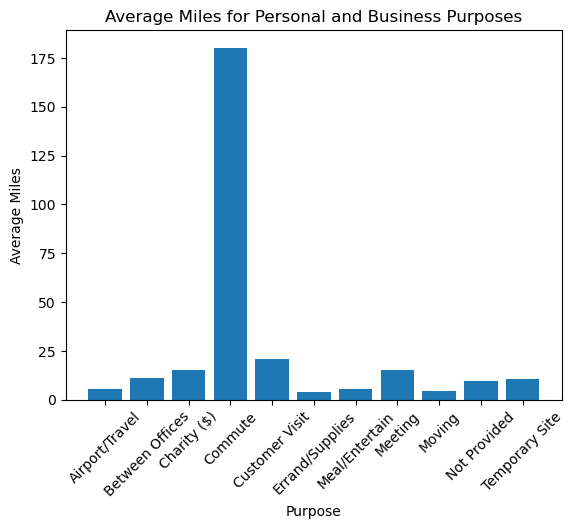

In [22]:
# Plotting the bar chart
plt.bar(avg_miles_purpose.index, avg_miles_purpose.values)
plt.xlabel('Purpose')
plt.ylabel('Average Miles')
plt.title('Average Miles for Personal and Business Purposes')
plt.xticks(rotation=45)
plt.show()

### Miles by Category

In [24]:
avg_miles_cat = df.groupby('CATEGORY')['MILES'].mean()
avg_miles_cat

CATEGORY
Business    10.656546
Personal     9.320779
Name: MILES, dtype: float64

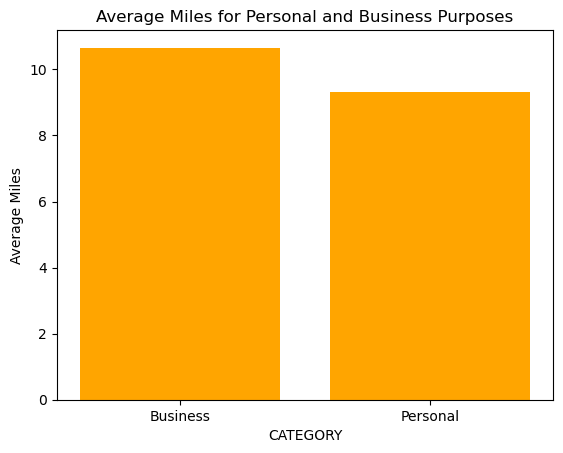

In [29]:
plt.bar(avg_miles_cat.index, avg_miles_cat.values , color='orange')
plt.xlabel('CATEGORY')
plt.ylabel('Average Miles')
plt.title('Average Miles for Personal and Business Purposes')
plt.show()

### Trips by Categories

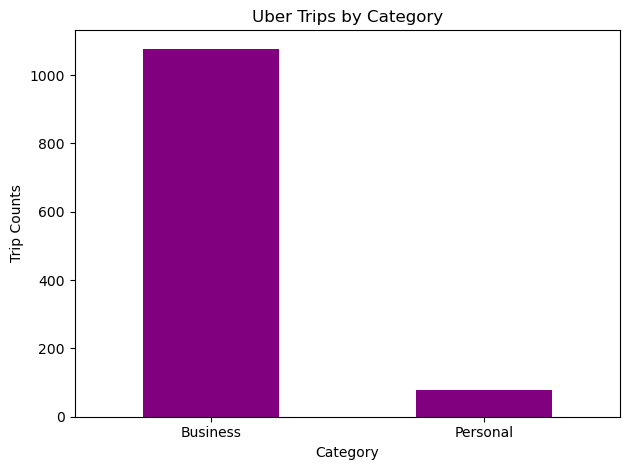

In [31]:
trips = pd.DataFrame(df["CATEGORY"].value_counts())

ax = trips.plot(kind="bar", color="purple", legend=None)

plt.xlabel('Category')
plt.ylabel('Trip Counts')
plt.title('Uber Trips by Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Ride durations

C:\Users\DELL\AppData\Local\Temp\ipykernel_9720\334454094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ride_duration'] = df['END_DATE'] - df['START_DATE']


Minimum ride duration: 0 days 00:00:00
Maximum ride duration: 0 days 05:36:00
Average ride duration: 0 days 00:23:14.506065857


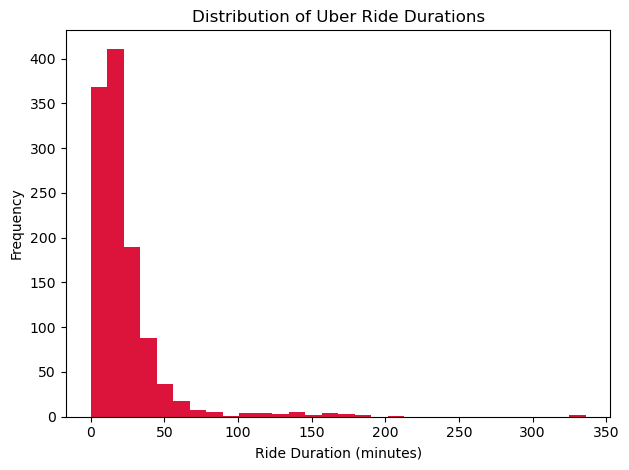

In [56]:
# Calculate ride durations as the difference between END_DATE and START_DATE
df['ride_duration'] = df['END_DATE'] - df['START_DATE']

# Calculate min, max, and average ride durations
min_duration = df['ride_duration'].min()
max_duration = df['ride_duration'].max()
avg_duration = df['ride_duration'].mean()

print("Minimum ride duration:", min_duration)
print("Maximum ride duration:", max_duration)
print("Average ride duration:", avg_duration)

#Plotting values
plt.hist(df['ride_duration'].dt.total_seconds() / 60, bins=30 , color= 'crimson') 
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Uber Ride Durations')
plt.tight_layout()
plt.show()

### Stations performence

In [40]:
# Get the top 10 start stations
t10_start_stations = df['START'].value_counts().nlargest(10)

# Get the top 10 stop stations
t10_stop_stations = df['STOP'].value_counts().nlargest(10)

print("Top 10 Start Stations:")
print(t10_start_stations)

print("\nTop 10 Stop Stations:")
print(t10_stop_stations)

Top 10 Start Stations:
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Karachi              31
Raleigh              28
Apex                 17
Name: START, dtype: int64

Top 10 Stop Stations:
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Karachi              31
Raleigh              28
Apex                 17
Name: STOP, dtype: int64


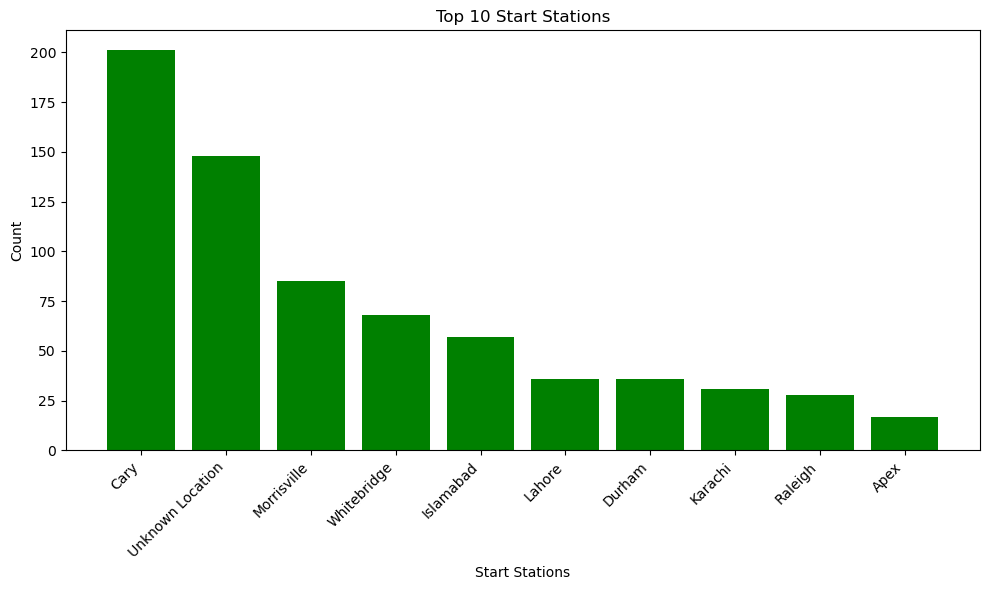

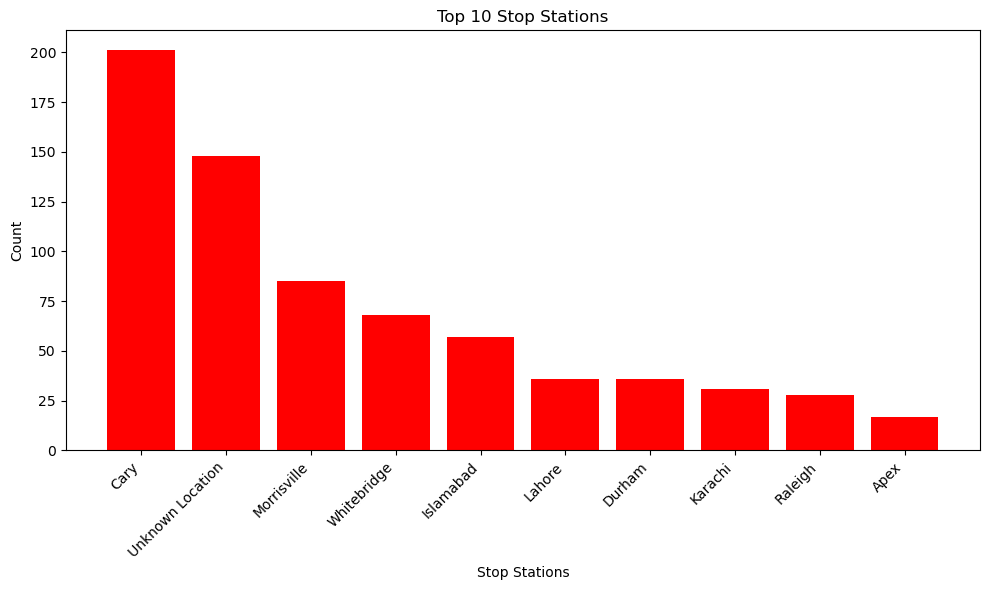

In [44]:
# Plotting the top 10 start stations
plt.figure(figsize=(10, 6))
plt.bar(t10_start_stations.index, t10_start_stations.values  , color='g')
plt.xlabel('Start Stations')
plt.ylabel('Count')
plt.title('Top 10 Start Stations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting the top 10 stop stations
plt.figure(figsize=(10, 6))
plt.bar(t10_stop_stations.index, t10_stop_stations.values , color='r')
plt.xlabel('Stop Stations')
plt.ylabel('Count')
plt.title('Top 10 Stop Stations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

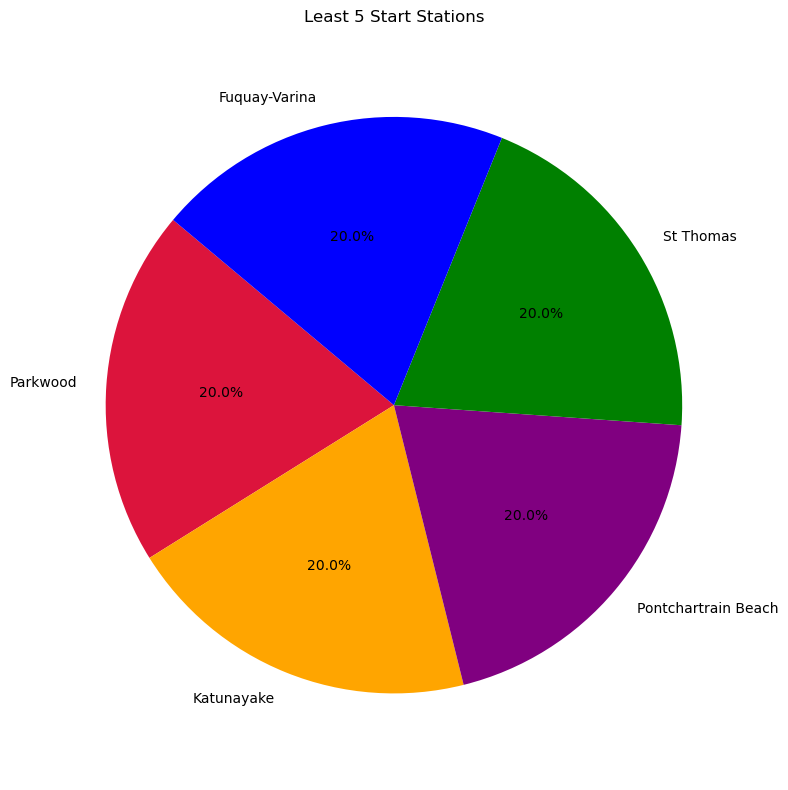

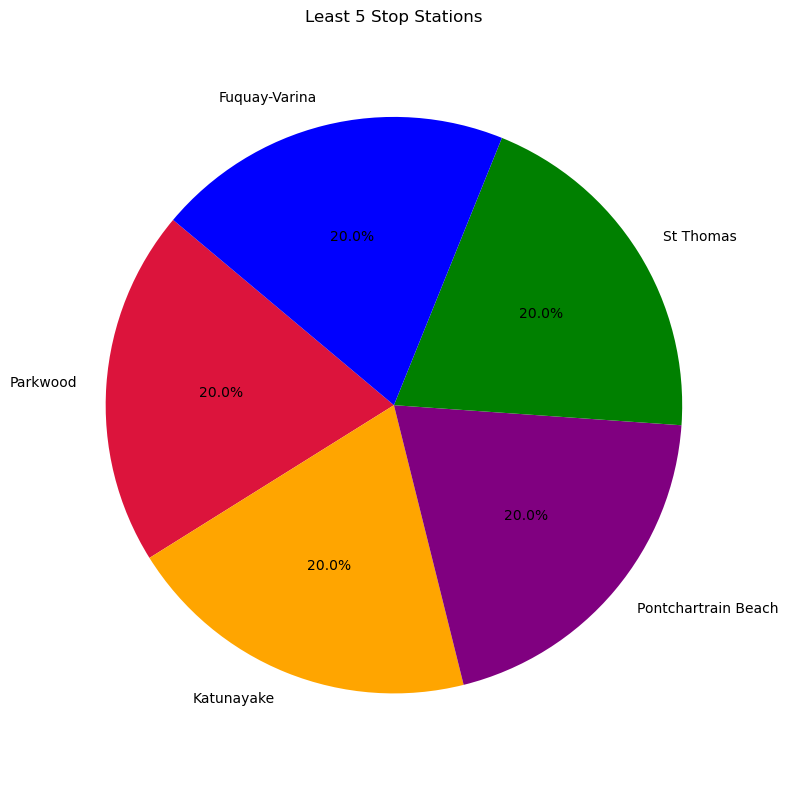

In [51]:
# Get the least 5 start stations
least5_start_stations = df['START'].value_counts().nsmallest(5)

# Get the least 5 stop stations
least5_stop_stations = df['STOP'].value_counts().nsmallest(5)

colors = ['crimson', 'orange', 'purple', 'green', 'blue']

# Plotting the top 10 start stations as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(least5_start_stations, labels=least5_start_stations.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.title('Least 5 Start Stations')
plt.tight_layout()
plt.show()

# Plotting the top 10 stop stations as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(least5_stop_stations, labels=least5_stop_stations.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.title('Least 5 Stop Stations')
plt.tight_layout()
plt.show()
